**brief description of each column in your data:**

1. **customerID:** customers ID
2. **gender:** integer indicating the customer's gender (0 = female, 1 = male)
3. **SeniorCitizen:** integer indicating whether the customer is a senior citizen (0 = no, 1 = yes)
4. **Partner:** integer indicating whether the customer has a partner (0 = no, 1 = yes)
5. **Dependents:** integer indicating whether the customer has dependents (0 = no, 1 = yes)
6. **tenure:** integer indicating the number of months the customer has been with the company
7. **PhoneService:** integer indicating whether the customer has a phone service (0 = no, 1 = yes)
8. **MultipleLines:** integer indicating whether the customer has multiple phone lines (0 = no phone service, 1 = no multiple    lines, 2 = yes multiple lines)
9. **InternetService:** integer indicating the type of internet service the customer has (0 = no internet service, 1 = DSL, 2 = fiber optic)
10. **OnlineSecurity:** integer indicating whether the customer has online security (0 = no internet service, 1 = no online security, 2 = yes online security)
11. **OnlineBackup:** integer indicating whether the customer has online backup (0 = no internet service, 1 = no online backup, 2 = yes online backup)
12. **DeviceProtection:** integer indicating whether the customer has device protection (0 = no internet service, 1 = no device - protection, 2 = yes device protection)
13. **TechSupport:** integer indicating whether the customer has tech support (0 = no internet service, 1 = no tech support, 2 = yes tech support)
14. **StreamingTV:** integer indicating whether the customer has streaming TV (0 = no internet service, 1 = no streaming TV, 2 = yes streaming TV)
15. **StreamingMovies:** integer indicating whether the customer has streaming movies (0 = no internet service, 1 = no streaming movies, 2 = yes streaming movies)
16. **Contract:** integer indicating the type of contract the customer has (0 = month-to-month, 1 = one year, 2 = two year)
17. **PaperlessBilling:** integer indicating whether the customer has paperless billing (0 = no, 1 = yes)
18. **PaymentMethod:** integer indicating the payment method used by the customer (0 = electronic check, 1 = mailed check, 2 = bank transfer, 3 = credit card)
19. **MonthlyCharges:** float indicating the customer's monthly charges
20. **TotalCharges:** float indicating the customer's total charges
21. **Churn:** integer indicating whether the customer has churned (0 = no, 1 = yes)

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

## Reading data

In [2]:
df=pd.read_csv("churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
- The dataset contains information on customer gender, senior citizenship status, partner, dependents, tenure, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, monthly charges, total charges, and churn status.
Some of the columns have binary values, while others have multiple categories.
- The 'tenure' column has a wide range of values.
- The 'PaymentMethod' column contains different methods of payment.
- The 'MonthlyCharges' and 'TotalCharges' columns have a range of numeric values.
 -The 'Chur'n column is the target variable and has two categories: "Yes" and "No".

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data preprocessing

In [7]:
print(df.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

**Observation:**

- The 'customerID' column has too many unique values and can be dropped.
- The following columns have categorical values that need to be converted to numeric for future analysis: 'gender', 'Partner', 'Dependents', 'OnlineSecurity', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', and 'Churn'.                                                    

In [8]:
df=df.drop(labels=['customerID'], axis=1)

In [9]:
print(df.apply(lambda col: col.unique()))

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [10]:
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [11]:
df['Partner'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PhoneService'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Dependents'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PaperlessBilling'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [12]:
df['InternetService'].replace({'No': 0, 'Fiber optic': 1,'DSL':2}, inplace=True)
df['MultipleLines'].replace({'No': 0, 'Yes': 1,'No phone service':2}, inplace=True)

In [13]:
df.loc[:, ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']] = df[['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

In [14]:
df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)':2,
       'Credit card (automatic)':3}, inplace=True)

In [15]:
df['Contract'].replace({'Month-to-month': 0, 'One year': 1,'Two year':2}, inplace=True)

In [16]:
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)


In [17]:
df.head(-1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,2,2,2,2,2,2,2,1,2,21.15,1419.4,0
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,1,84.80,1990.5,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.9,0
7040,0,0,1,1,11,0,2,2,1,0,0,0,0,0,0,1,0,29.60,346.45,0


**Observation:**

Converting categorical values into numeric can be useful for machine learning models as they typically require numeric inputs. It allows the model to understand the relationship between the features and the target variable. By replacing the categorical values with numeric values, we can create a more accurate model.



All columns in the dataset now have numeric values, hence the dtype needs to be converted from object to int.

In [18]:
df = df.apply(pd.to_numeric, errors='coerce')

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## Visualization

c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Churn', ylabel='count'>

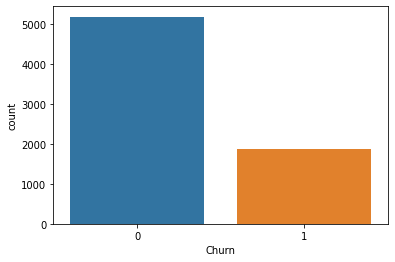

In [20]:
sns.countplot(df['Churn'])

**Observation**

The number of customers who have churned is less than 2000.

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

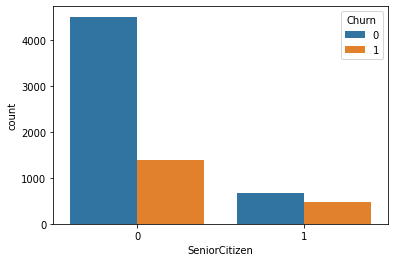

In [27]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

<Figure size 432x288 with 0 Axes>

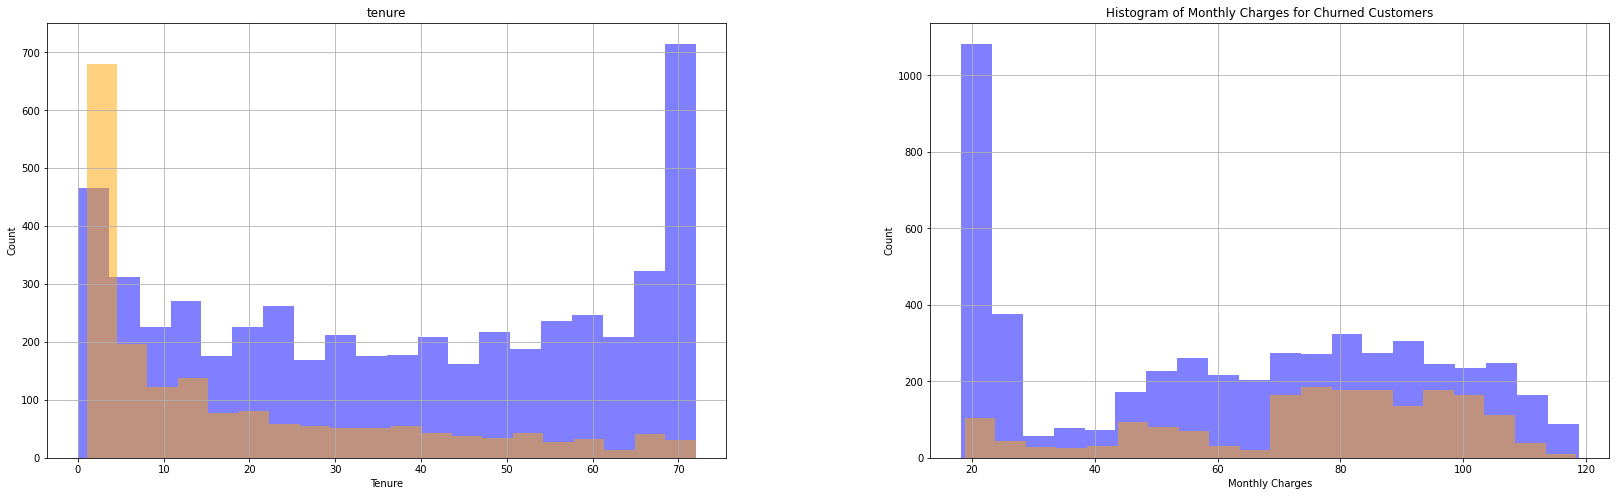

In [33]:
numericFeatures = ['tenure', 'MonthlyCharges']

plt.clf()

fig, ax = plt.subplots(1, 2, figsize=(28, 8))

df[df.Churn == 0][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Tenure for Non-Churned Customers')

df[df.Churn == 1][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)
ax[1].set_xlabel('Monthly Charges')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of Monthly Charges for Churned Customers')

plt.show()


In [25]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


- TotalCharge in float value that doesnot matter however we need numeric values 

## EDA


In [26]:
Retained = df[df.Churn == 1].shape[0]
Churned = df[df.Churn == 0].shape[0]


print(Retained/(Retained + Churned) * 100,'% of customers stayed in the company')
print(Churned/(Retained + Churned) * 100, '% of customers left with the company')

26.536987079369588 % of customers stayed in the company
73.4630129206304 % of customers left with the company


#### Scaled the data